# Statistical Inference of Luminosity and Temperature of Dwarf Stars

### Ahmed Rizk, Cathy Liu, Divya Bilolikar, Olivia Pang

In [7]:
library(tidyverse)
library(infer)
library(gridExtra)
library(testthat)
library(digest)
library(broom)

## Introduction

Stars are typically classified into four different groups – white dwarfs, main sequence, giants, and supergiants (Chiosi, 1992). A typical star will become a main sequence star, then end its life cycle as a white dwarf. This is the most frequent lifecycle that we see (Tillman, 2022). White dwarfs are very small dense stars that are not very bright when compared to main-sequence stars (Koester, 1990). Contrary to their name, the red dwarfs are not a type of white dwarf but rather a type of small main-sequence star that is not very bright. Similarly, we have brown dwarfs, which are not usually classified as stars because they do not burn hot enough. (Tillman, 2019) When a massive star is formed, it will become a giant star or a supergiant and then end its lifecycle as a neutron star or a blackhole. Giants and supergiants are enormous stars that shine very bright when compared to main-sequence stars (Chiosi, 1992). 

While white, red, and brown dwarf stars share a name, they are very different and typically not classified together. This is clearly seen in an Hertzsprung-Russell diagram (a scatter plot that shows the trends in star types against luminosity, temperature, color, and magnitude) where white dwarfs have their own classification in the bottom left, and red and white dwarfs are grouped together in the main sequence group towards the bottom right. Since all three stars appear on the bottom half of the diagram we want to explore the difference in luminosity and temperature between the three.


## Analysis Question
In this project, we want to determine if there is a difference in luminosity and temperature between red, brown, and white dwarf stars. Our location parameter will be the mean of luminosity and temperature and our scale parameter will be the standard deviation of both luminosity and temperature. We chose these because we have a large dataset (240 observations) and thus the CLT takes effect, and we can treat the dataset as normally distributed.

We are using the "Star dataset to predict star types" dataset from https://www.kaggle.com/datasets/deepu1109/star-dataset. The variables are as follows:

#### Table 1: Variables and their descriptions
| Variable | Description |
| :-: | :-: |
| Absolute Temperature (K) | The temperature of the star in Kelvin |
| Relative Luminosity (L/Lo) | The luminosity of the star when divided by the average luminosity of the sun (3.828 x 10^26 Watts) |
| Relative Radius (R/Ro) | The radius of the star when divided by the average radius of the sun (6.9551 x 10^8 m) |
| Absolute Magnitude (Mv) | The absolute magnitude of the star |
| Star Color | The color of the star |
| Spectral Class (O,B,A,F,G,K,M) | If the star is a main sequence star, the type of main sequence star it is |
| Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants) | The type of star it is | 

## Preliminary Analysis

### Reading the dataset into R

In [8]:
stars <- read.csv("6-class.csv")

glimpse(stars)

Rows: 240
Columns: 7
$ Temperature..K.        <int> 3068, 3042, 2600, 2800, 1939, 2840, 2637, 2600,…
$ Luminosity.L.Lo.       <dbl> 0.002400, 0.000500, 0.000300, 0.000200, 0.00013…
$ Radius.R.Ro.           <dbl> 0.17000, 0.15420, 0.10200, 0.16000, 0.10300, 0.…
$ Absolute.magnitude.Mv. <dbl> 16.120, 16.600, 18.700, 16.650, 20.060, 16.980,…
$ Star.type              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,…
$ Star.color             <chr> "Red", "Red", "Red", "Red", "Red", "Red", "Red"…
$ Spectral.Class         <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M…


### Cleaning and Wrangling

Since the target categorical variable for our analysis is the star type, we need to change it from type 'int' to type 'factor'.

In [9]:
stars <- mutate(stars, Star.type = as_factor(Star.type))

Next, we filter out the Giant stars (types 3, 4 and 5) to isolate the Dwarfs.

In [10]:
dwarfs <- stars %>%
filter(Star.type != 5) %>%
filter(Star.type != 4) %>%
filter(Star.type != 3)


After that, we do a quick glimpse on the resulting data set. After summarizing the data set and counting the rows, we found that each star type has the same number of samples (n = 40). 

In [11]:
dwarf_count <- dwarfs %>%
               group_by(Star.type)%>%
               summarise(n = n())

dwarf_count

Star.type,n
<fct>,<int>
0,40
1,40
2,40


### Visualizations

We can create boxplots to show the variation in luminosity and temperature across star types. This will give us a rough idea of the differences between each star type, and tell us if any groups are vastly different from the rest.

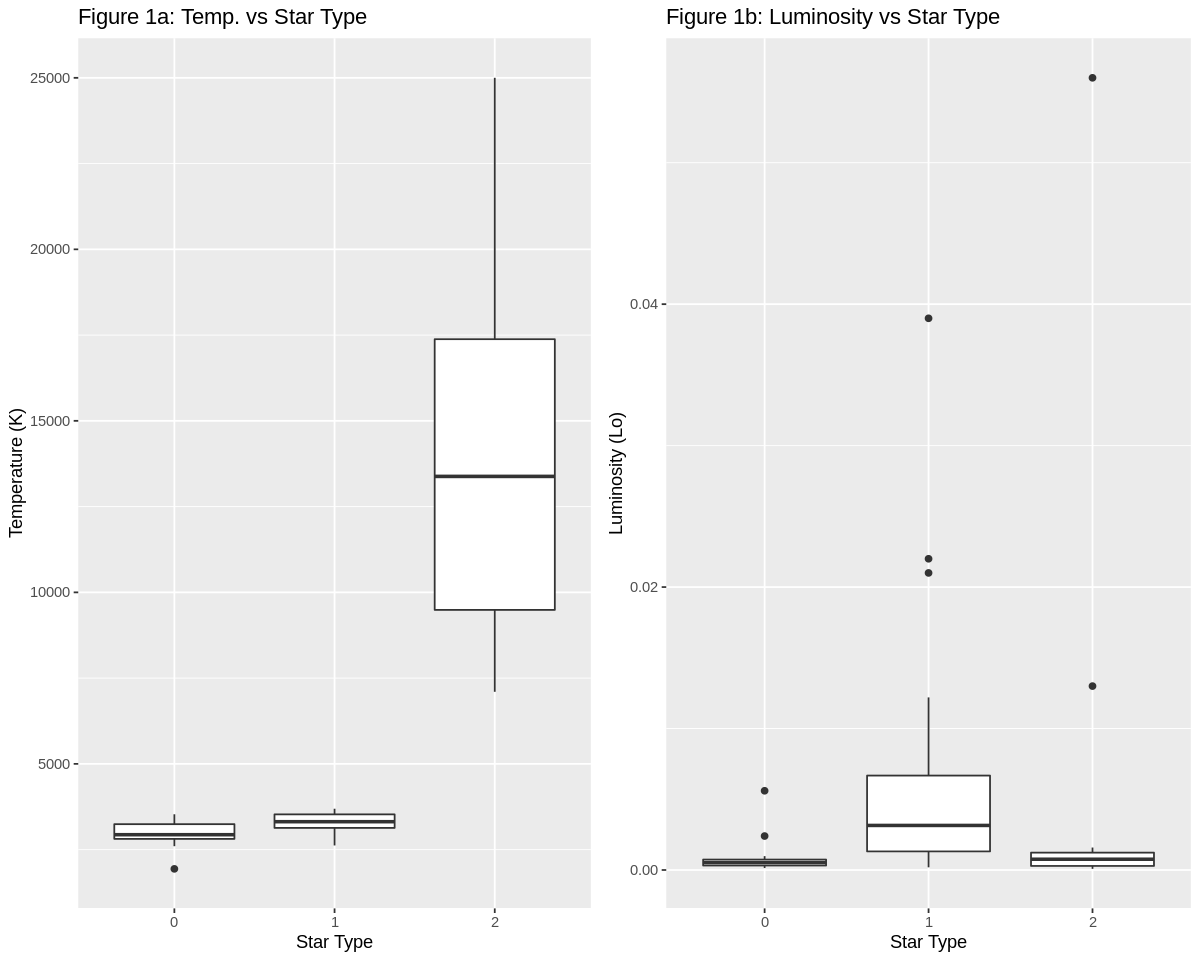

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8) 
L_box <- ggplot(dwarfs, aes(x = Star.type, y = Luminosity.L.Lo.)) + geom_boxplot() + 
        ggtitle("Figure 1b: Luminosity vs Star Type") + xlab("Star Type") + ylab("Luminosity (Lo)")
T_box <- ggplot(dwarfs, aes(x = Star.type, y = Temperature..K.)) + geom_boxplot() +  
        ggtitle("Figure 1a: Temp. vs Star Type") +  xlab("Star Type") + ylab("Temperature (K)")
grid.arrange(T_box, L_box, ncol=2, widths = c(4,4))

In figure 1a and figure 1b above we can see the distributions of Luminosity vs Star type and Temperature vs Star type respectively. In figure 1a we can see that the range and mean of star type 0 and type 1 are very similar, however, both the mean and interquartile range of star type 2 is very large. In figure 1b we can see that the means of the luminosity across star types are very similar however, the interquartile range of star type 1 is much larger.


To find the within group distributions for each star type, we will separate the data into 3 different parts, each representing a star type.

In [13]:
type_0 <- filter(stars, Star.type == 0)
type_1 <- filter(stars, Star.type == 1)
type_2 <- filter(stars, Star.type == 2)

#### Brown Dwarf Distributions

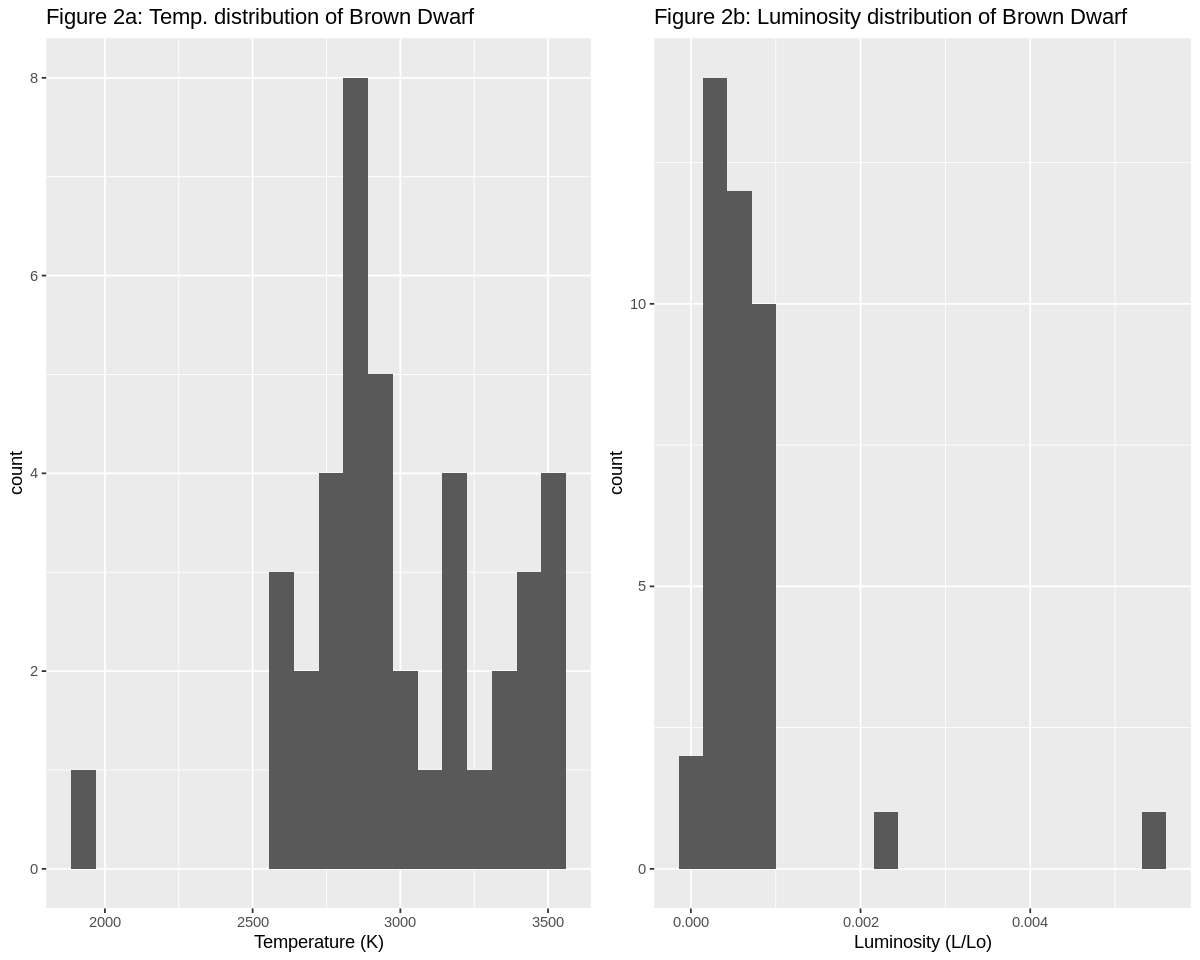

In [14]:
# Find the distribution of luminosity and temperature values for the brown dwarf star
options(repr.plot.width = 10, repr.plot.height = 8) 
L_0 <- ggplot(type_0, aes(x = Luminosity.L.Lo.))+ xlab("Luminosity (L/Lo)") + geom_histogram(bins = 20) + ggtitle("Figure 2b: Luminosity distribution of Brown Dwarf")
T_0 <- ggplot(type_0, aes(x = Temperature..K.))+ xlab("Temperature (K)") + geom_histogram(bins = 20) + ggtitle("Figure 2a: Temp. distribution of Brown Dwarf")
grid.arrange(T_0, L_0, ncol=2,widths = c(4,4))


In figure 2a, we can see that the distribution looks bimodal peaking at around 2800 K and 3500 K. In figure 2b above, we can see that the distribution is unimodal and looks fairly normal with a few larger outliers. Most stars seem to have a luminosity between 0 and 0.001 LL_o.

#### Red Dwarf Distributions

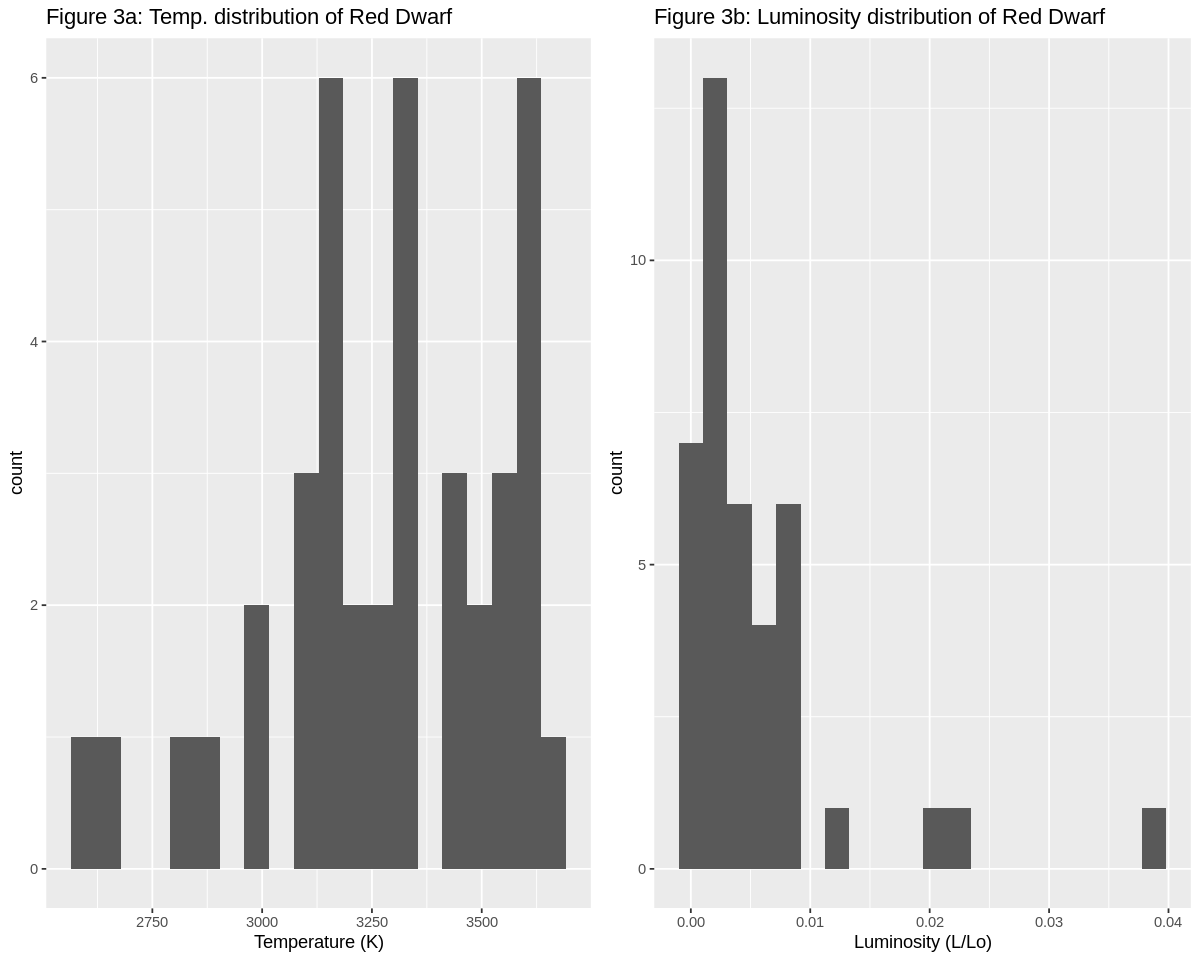

In [15]:
# Find the distribution of luminosity and temperature values for the red dwarf star
options(repr.plot.width = 10, repr.plot.height = 8) 
L_1 <- ggplot(type_1, aes(x = Luminosity.L.Lo.))+ xlab("Luminosity (L/Lo)") + geom_histogram(bins = 20)+ ggtitle("Figure 3b: Luminosity distribution of Red Dwarf")
T_1 <- ggplot(type_1, aes(x = Temperature..K.))+ xlab("Temperature (K)") + geom_histogram(bins = 20)+ ggtitle("Figure 3a: Temp. distribution of Red Dwarf")
grid.arrange(T_1, L_1, ncol=2, widths = c(8,8))

In figure 3a we can see that the distribution looks unimodal peaking in the range of 3100K to 3500K. Similar to the brown dwarfs, the distribution of figure 3b is unimodal and looks fairly normal with a few larger outlier. Most stars seem to have a luminosity between 0 and 0.01 LL_o. 

#### White Dwarf Distributions

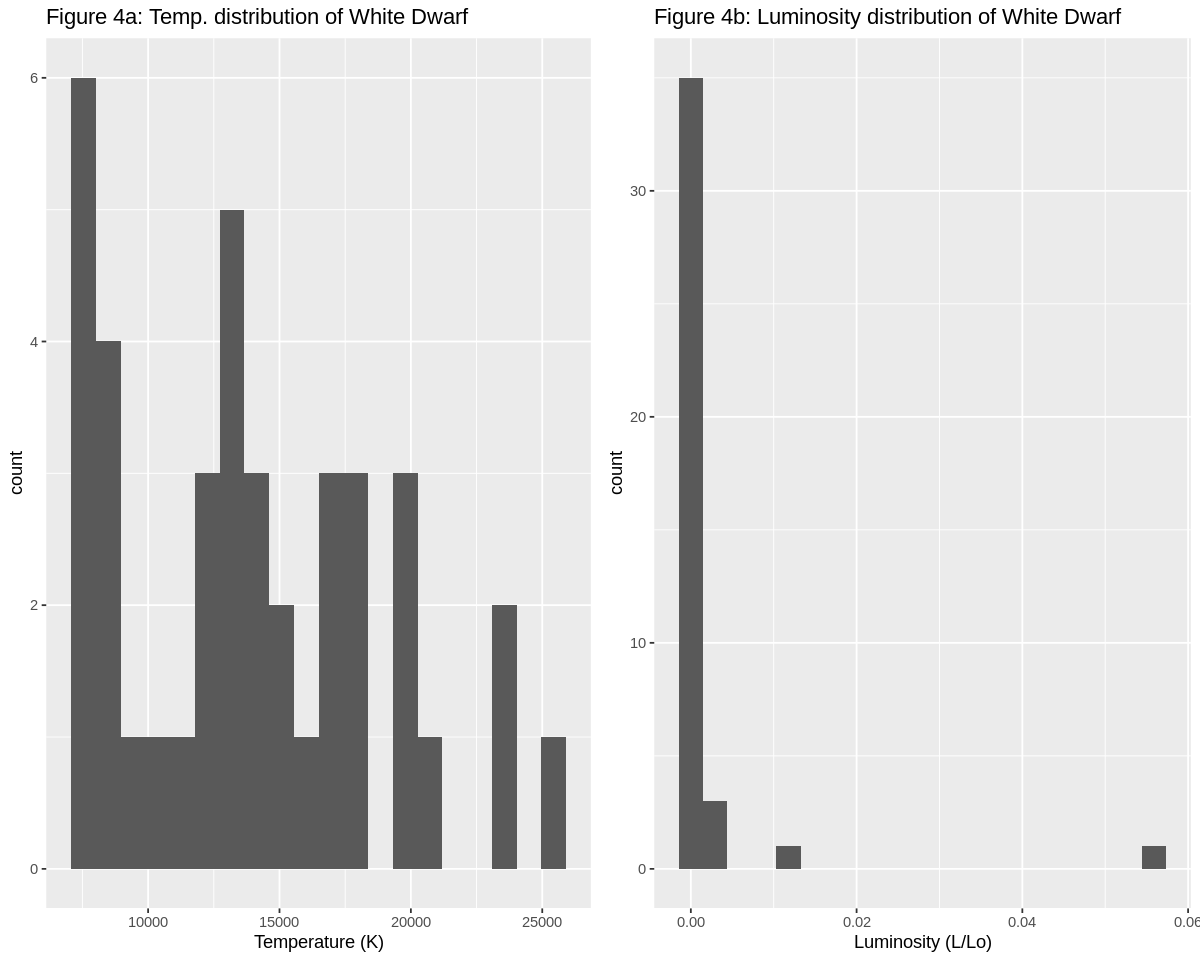

In [16]:
# Find the distribution of luminosity and temperature values for the white dwarf star
options(repr.plot.width = 10, repr.plot.height = 8) 
L_2 <- ggplot(type_2, aes(x = Luminosity.L.Lo.))+ xlab("Luminosity (L/Lo)") + geom_histogram(bins = 20)+ ggtitle("Figure 4b: Luminosity distribution of White Dwarf")
T_2 <- ggplot(type_2, aes(x = Temperature..K.))+ xlab("Temperature (K)") + geom_histogram(bins = 20)+ ggtitle("Figure 4a: Temp. distribution of White Dwarf")
grid.arrange(T_2, L_2, ncol=2)

Finally, figure 4b has the same characteristics as the other two. Most stars seem to have a luminosity between 0 and 0.005 LL_o. In figure 4a we can see that the distribution looks right skewed and unimodal.

### Computing Parameter Estimates

In each of the following sections, we find the mean and standard deviation of both the luminosity and temperature for each star type we are considering. 

#### Brown Star Estimates

In [17]:
# Finding the mean and standard deviation of the luminosity and temperature of the brown star

brown_dwarf_stats <- type_0 %>% 
    summarise(mean_lum = mean(Luminosity.L.Lo.), 
              sd_lum = sd(Luminosity.L.Lo.),
              mean_temp = mean(Temperature..K.),
              sd_temp = sd(Temperature..K.)) %>%
    add_column(Type = "Brown", .before = "mean_lum")

print("Table 2: Brown Dwarf Statistics")
brown_dwarf_stats

[1] "Table 2: Brown Dwarf Statistics"


Type,mean_lum,sd_lum,mean_temp,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Brown,0.000693275,0.0008879057,2997.95,332.2763


In [18]:
# Finding the mean and standard deviation of the luminosity and temperature of the red star

red_dwarf_stats <- type_1 %>% 
    summarise(mean_lum = mean(Luminosity.L.Lo.), 
              sd_lum = sd(Luminosity.L.Lo.),
              mean_temp = mean(Temperature..K.),
              sd_temp = sd(Temperature..K.)) %>%
    add_column(Type = "Red", .before = "mean_lum")

print("Table 3: Red Dwarf Statistics")
red_dwarf_stats

[1] "Table 3: Red Dwarf Statistics"


Type,mean_lum,sd_lum,mean_temp,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Red,0.00540575,0.00733024,3283.825,269.6373


In [19]:
# Finding the mean and standard deviation of the luminosity and temperature of the white star

white_dwarf_stats <- type_2 %>% 
    summarise(mean_lum = mean(Luminosity.L.Lo.), 
              sd_lum = sd(Luminosity.L.Lo.),
              mean_temp = mean(Temperature..K.),
              sd_temp = sd(Temperature..K.)) %>%
    add_column(Type = "White", .before = "mean_lum")

print("Table 4: White Dward Statistics")
white_dwarf_stats

[1] "Table 4: White Dward Statistics"


Type,mean_lum,sd_lum,mean_temp,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
White,0.002433625,0.008912496,13931.45,4957.655


In [20]:
# Combining all parameter estimates together

print("Table 5: Star Statistics")
parameter_estimates <- rbind(brown_dwarf_stats, red_dwarf_stats, white_dwarf_stats)
parameter_estimates

[1] "Table 5: Star Statistics"


Type,mean_lum,sd_lum,mean_temp,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Brown,0.000693275,0.0008879057,2997.950,332.2763
Red,0.005405750,0.0073302401,3283.825,269.6373
White,0.002433625,0.0089124960,13931.450,4957.6552


Above is a summary of all the statistics for each star type. We can see that the mean luminosity of brown dwarfs is significantly smaller (a power of 10) than the mean luminosity of red and white dwarfs. Similarly the standard error of brown dwarfs is significantly smaller (by a power of 10) than the standard error of red and white dwarfs. 

The mean temperature of white dwarfs is larger than the means of red and brown dwarfs by a power of 10. The standard error of white dwarfs is larger than the standard error of the other two by a power of 10.

## Methods

While our estimations are a good starting point, they are not enough to present to a stakeholder at face value due to sampling variability. The plots would be a better representation if we were to do some further data processing like bootstrapping or asymptotic testing. Additionally, there is no way to find the sampling variability of the entire population of stars by examining point estimates of the standard deviation, or the distribution of values of the dataset. 

Although the mean estimates we have calculated provide a good basis for us to create confidence intervals, we ultimately decided not to pursue that route. Our analysis primarily focuses on differences between parameters as opposed to trying to infer the value of said parameters. Furthermore, finding confidence intervals for 3 pairs of means will result in a large number of hypothesis tests (6 in total). This will increase the probability of committing type I error, and is a further reason to find a different method of carrying out the analysis.

Our analysis will examine the means of 2 variables for 3 different groups. Therefore, using 2 hypotheses would minimize the probability of making a type I error. In this project, since our goal is to analyze the difference between temperature and luminosity of three groups of dwarf planets, ANOVA becomes very appropriate and effective. This is aided by the fact that the dataset fulfills most of the conditions for ANOVA tests. The dataset is fairly large and therefore likely representative of the true population, making our findings generalizable due to the CLT. It was also sampled independently, where each type of star (or group) has an equal number of observations, as found in our EDA. 

Performing a bootstrap would make our conclusions generalizable enough to present to a stakeholder (by estimating the sampling distribution). The technique does not pertain exclusively to confidence intervals. However, bootstrapping for ANOVA is beyond the scope of what we have learned.

In the following part of the project, we will conduct two ANOVA tests, one for the means of each variable within the three dwarf groups, and analyze the results.


# ANOVA

ANOVA (Analysis of Variance) is a test that determines whether there exists a difference between means across three or more groups by analyzing the overall and within-group variance. ANOVA test calculates the F-value, which is the ratio of the variability between group means and the variation within groups, and the corresponding p-value. If the F-value is significantly greater than 1, the p-value is going to be small and we conclude that the variability between group means exists.


### ANOVA for Temperature Across all Three Dwarf Types

We start with temperature. Before actually starting the ANOVA test, we need to do a little bit of cleanup, select the columns that we want, which are Star Type and Temperature.

In [21]:
# filter out the target column Temperature to get the tidy data set
dwarfs_temp <- dwarfs %>%
               select(Temperature..K., Star.type)
head(dwarfs_temp)

,Temperature..K.,Star.type
,<int>,<fct>
1,3068,0
2,3042,0
3,2600,0
4,2800,0
5,1939,0
6,2840,0


The resulting table contains two columns, temperature and star type. Temperature is a numeric variable which is the target of the test. Star type is a factor indicating groups for ANOVA.
In the following two blocks of code, we perform ANOVA test on temperature across three groups of dwarfs.

In [22]:
# Perform ANOVA test and print the result table
anova_temp <- aov(Temperature..K.~Star.type, data = dwarfs_temp)%>%
              tidy()
print("Table 10: ANOVA results for Temperature")
print(anova_temp)

[1] "Table 10: ANOVA results for Temperature"
# A tibble: 2 × 6
  term         df       sumsq      meansq statistic   p.value
  <chr>     <dbl>       <dbl>       <dbl>     <dbl>     <dbl>
1 Star.type     2 3106600865. 1553300433.      188.  2.74e-37
2 Residuals   117  965696814.    8253819.       NA  NA       


In [23]:
# Filter out the F-value from the table above
# Filter out the p-value from the table above
f_stat_temp <- anova_temp %>%
          filter(term == "Star.type") %>%
          select(statistic) %>%
          as.numeric()
anova_pval_temp <- anova_temp %>%
              filter(term == "Star.type") %>%
              select(p.value) %>%
              as.numeric()
print(f_stat_temp)
print(anova_pval_temp)

[1] 188.1917
[1] 2.738892e-37


After performing ANOVA test on temperature, we obtained the F-value = 188.91, and the p-value = 2.74e-37. 

### ANOVA for Luminosity Across all Three Dwarf Types

In this piece of code, we cleanup the original data set by selecting luminosity and star type columns in order to prepare for the ANOVA test.

In [24]:
# filter out the target column Luminosity to get the tidy data set
dwarfs_lumi <- dwarfs %>%
               select(Luminosity.L.Lo., Star.type)
head(dwarfs_lumi)

,Luminosity.L.Lo.,Star.type
,<dbl>,<fct>
1,0.002400,0
2,0.000500,0
3,0.000300,0
4,0.000200,0
5,0.000138,0
6,0.000650,0


The resulting table contains two columns, luminosity and star type. In this case, luminosity is a numeric variable served as the target of the test. Star type is an explanatory factor indicating groups for ANOVA. In the following two blocks of code, we perform ANOVA test on luminosity across three groups of dwarfs.

In [25]:
# Perform ANOVA test and print the result table
anova_lumi <- aov(Luminosity.L.Lo.~Star.type, data = dwarfs_lumi)%>%
              tidy()
print("Table 11: ANOVA results for Luminosity")
print(anova_lumi)

[1] "Table 11: ANOVA results for Luminosity"
# A tibble: 2 × 6
  term         df    sumsq    meansq statistic  p.value
  <chr>     <dbl>    <dbl>     <dbl>     <dbl>    <dbl>
1 Star.type     2 0.000454 0.000227       5.09  0.00761
2 Residuals   117 0.00522  0.0000447     NA    NA      


In [26]:
# Filter out the F-value from the table above
# Filter out the p-value from the table above
f_stat_lumi <- anova_lumi %>%
          filter(term == "Star.type") %>%
          select(statistic) %>%
          as.numeric()
anova_pval_lumi <- anova_lumi%>%
              filter(term == "Star.type") %>%
              select(p.value) %>%
              as.numeric()
print(f_stat_lumi)
print(anova_pval_lumi)

[1] 5.086809
[1] 0.007614593


After performing ANOVA test on luminosity, we obtained the F-value = 5.09, and the p-value = 0.0076. 

# Results

The table below summarizes the result from two ANOVA tests.

In [28]:
# Result table to show the obtained F-values and P-values
table <- data.frame (Type  = c("F-Value", "p-Value"),
                     Temperature_Result = c(f_stat_temp, anova_pval_temp),
                     Luminosity_Result = c(f_stat_lumi, anova_pval_lumi))
print("Table 12: F-Value and p-Value for temperature and luminosity")
table

[1] "Table 12: F-Value and p-Value for temperature and luminosity"


Type,Temperature_Result,Luminosity_Result
<chr>,<dbl>,<dbl>
F-Value,1.881917e+02,5.086809377
p-Value,2.738892e-37,0.007614593


The F-value for temperature obtained is 188.91, and the p-value is 2.74e-37. In this case, our F-value is significantly greater than 1. Therefore, the variation between group means is clearly larger than the variation within groups, indicating that at least one of the mean values is different across three groups. The p-value also states the result. Since the p-value is significantly smaller than the critical value (0.05), it falls in the "reject" region. Therefore, by looking at the ANOVA test results for temperature, we can say that at least one of the mean values is different across the groups, meaning the mean temperatures of all three dwarf groups are not the same.

The F-value for luminosity obtained is 5.09, and the p-value is 0.0076. Although we get a much smaller F-value than from the temperature test, it is still clearly larger than 1. The p-value is also smaller than the critical value (0.05) and falls in the "reject" region. Although the difference in luminosity across the groups is not as significant as the difference in temperature, we can still confidently say that at least one mean value is different from the others, so the mean luminosity values of the three dwarf groups are not all the same. 


# Discussion

The results of our temperature ANOVA test showed that we got a p-value of 2.74e-37. This is significantly less than our alpha level of 0.05. As a result, we reject the Null Hypothesis and conclude that there is a difference in the mean temperature of stars across the three categories (brown dwarfs, red dwarfs, and white dwarfs). From this one-way ANOVA test, we cannot conclude how the means differ, just that all three means are not the same.
 
The results of our luminosity ANOVA test showed that we got a p-value of 0.008. Once again, this is less than our alpha level of 0.05 and thus we reject the Null Hypothesis that the means of the luminosity are the same across all three star types. The results were as expected, as our exploratory data analysis showed us (through the graphs and point estimates) that the means of the star types for both temperature and luminosity were different. 

Even though the probability of a type I error is very small, we do not believe that we are at risk of committing a type II error. As the probability of type I error decreases, the probability of committing a type II error increases. However, this should mostly be offset by our large sample size.

To promote credibility and trustworthiness of our report we took the following steps: First of all, the data set is relatively large, which makes it a reasonable representation of the entire population and it allows us to generalize the result to a larger scale. We ensured that the conditions for ANOVA were fulfilled, and narrated the code so that it is easy to understand and reproduce if necessary. If presented to a stakeholder, the visualizations included will make our report more trustworthy even if they are unfamiliar with the analytical methods used. Each one of our steps build on each other, and are clearly and effectively communicated. Finally, all sources are properly cited, which adds to the credibility of the report.


## Implication of Findings

The results of our ANOVA test indicate that there do exist differences between the three types of dwarfs in terms of temperature and luminosity. We are now relatively confident that the three types of dwarfs do not have the same average temperature and luminosity. 

First of all, we believe this finding further clarifies the difference between dwarf stars, giving a better understanding of stars and celestial bodies in the universe. In the article Red dwarfs: The most common and longest-lived stars, the author states that there is no true definition of a red dwarf; the classification just refers to dwarf stars with different spectral types (Tillman, 2019). Therefore, we hope our findings would bring attention to and encourage others to improve clarity when communicating the star classification system or conducting other forms of astronomical analysis. 

Furthermore, the differences in temperature and luminosity could indicate the existence of other factors that are yet to be discovered. It could lead to research concerning the reasons behind these differences and positively impact our current knowledge of celestial bodies.


## Limitations of Analysis

There are several limitations to our analysis. The first is that although ANOVA would be far better at limiting the probability of type I error (as opposed to using multiple confidence intervals), our groups do not have roughly equal variances. The temperature of white stars has a variance of $4957.6552^2$, which far exceeds that of the other two groups. A similar phenomenon is observed in the luminosity of brown stars, which is far less than the other two groups. Therefore, our F-scores for both variables are somewhat inflated. 

A second limitation is that although our dataset is sufficiently large (240 observations), our within-group distributions for the luminosity of white/brown/red stars are right-skewed. Therefore, we might need a larger sample for the CLT to take effect for luminosity.


## Further Questions

Since our preliminary analysis suggests which type of star varies in terms of the means and variances from the rest, a possible future analysis could be done to explore the temperatures and luminosities of the (red, brown) and the (red, white) stars respectively. 

Additionally, we can also explore other star variables such as magnitude and color and see how their means differentiate.


# References

Chiosi, Cesare, Gianpaolo Bertelli, and Alessandro Bressan. "New developments in understanding the HR diagram." Annual review of astronomy and astrophysics 30.1 (1992): 235-285.

Koester, Detlev, and Ganesar Chanmugam. "Physics of white dwarf stars." Reports on Progress in Physics 53.7 (1990): 837.

Tillman, Nola Taylor, and Ben Biggs. “Main Sequence Stars: Definition & Life Cycle.” Space.com, Space, 26 Jan. 2022, https://www.space.com/22437-main-sequence-star.html. 

Tillman, Nola Taylor. “Red Dwarfs: The Most Common and Longest-Lived Stars.” Space.com, Space, 6 June 2019, https://www.space.com/23772-red-dwarf-stars.html. 